In [1]:
# importing basic EDA libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# setting figure parameters and style
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='viridis')

# labelencoder is used for encoding categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# importing logistic regression model
from sklearn.linear_model import LogisticRegression

#importing  test train split 
from sklearn.model_selection import train_test_split

# for scaling the data
from sklearn.preprocessing import StandardScaler

# metics to check the performance of the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score

In [2]:
#importing Data
df=pd.read_excel('Copy of bank-full_(1)(1).xlsx')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# statistics for numeric data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# getting stats for object data
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [8]:
# checking for null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

In [10]:
# getting values unique entries of target label
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Category count in Target column')

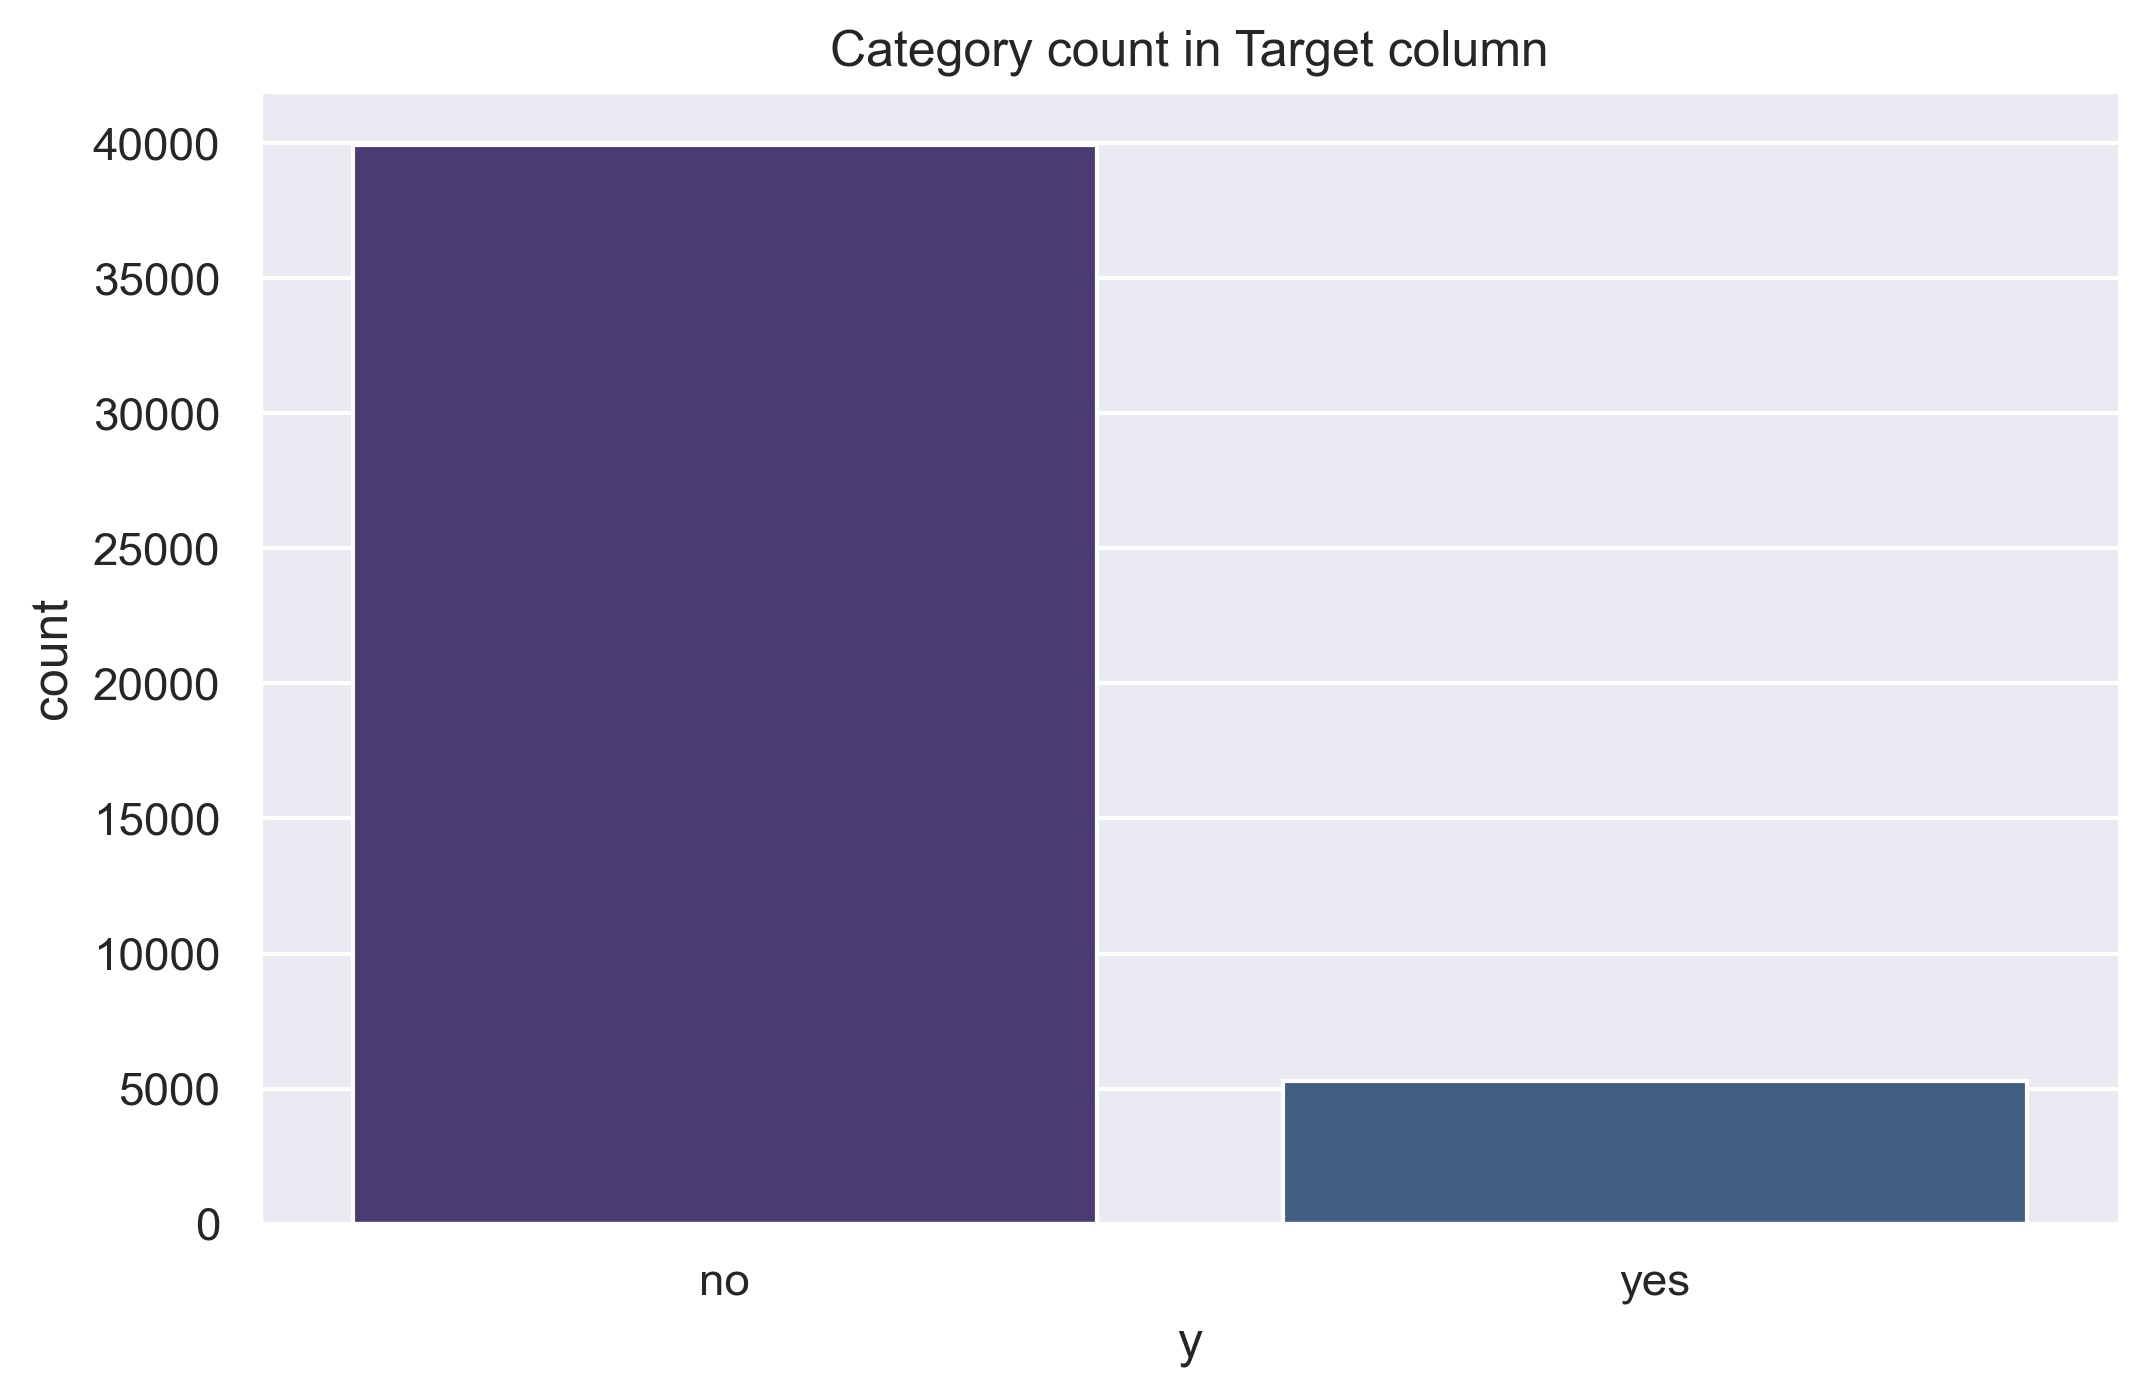

In [11]:
# visualization of target variable
sns.countplot(data = df, x = 'y')
plt.title('Category count in Target column')

In [ ]:
sns.pairplot(data = df, hue = 'y', palette='Set1',)

In [ ]:
sns.countplot(data = df, x = 'job',order=df['job'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Job category count')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = 'job',order=df['job'].value_counts().index, hue = 'y')
plt.xticks(rotation = 90)
plt.ylim(0,200)
plt.title('Target category wise jobs')
plt.show()

In [ ]:
df['marital'].value_counts().plot(kind = 'pie', autopct = '%0.0f%%')
plt.title('marital status category wise percentage')

In [ ]:
df['education'].value_counts().plot(kind = 'pie', autopct = '%0.0f%%')
plt.title('education category percentage')

In [ ]:
#Target data is highly imbalanced

In [ ]:
#visualizing only object type data
df[df.select_dtypes(include=['object']).any(axis=1)]

In [ ]:
# creating a dataset that contains all the object datatype row from main dataframe
df_categorical = df.select_dtypes('object')
df_categorical.head()

In [ ]:
# creating a dataset that contains all the integer datatype row from main dataframe
df_num = df.select_dtypes('int64')
df_num.head()

In [ ]:
# encoding categorical (object) columns using label encoding
for column in df_categorical:
    df_categorical[column] = encoder.fit_transform(df_categorical[column])

In [ ]:
df_categorical.head()

In [ ]:
df_categorical.info()

In [ ]:
# concatination of integer columns and encoded ccategorical columns
df = pd.concat([df_num,df_categorical],axis = 1)

In [ ]:
df.head(2)

In [ ]:
# splitting the data into feature and target variable
x = df.drop('y', axis = 1)
y = df['y']

In [ ]:
# train test split of data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
x_train

In [ ]:
y

In [ ]:
# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# creating a model instance
model  = LogisticRegression()

In [ ]:
# training the model
model.fit(x_train,y_train)

In [ ]:
#checking model coefficients
model.coef_

In [ ]:
# making predictions based on x_test
y_pred = model.predict(x_test)

In [ ]:
# accuracy of model
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
'''
Given the imbalanced nature of the data, relying solely on accuracy may not provide an accurate assessment of the model's performance. Consequently, an evaluation based on both recall and precision becomes crucial.

The model exhibits excellent recall and precision for the class labeled as '0'. This proficiency is expected, considering the higher count of '0's compared to '1's in the dataset. The model accurately predicts instances belonging to the '0' class.

However, the performance metrics for the class labeled as '1' reveal a different story. The imbalance in the counts of '1's and '0's adversely affects both recall and precision for the '1' class, resulting in poorer model predictions for instances belonging to this minority class. Addressing this imbalance may be necessary to improve the model's ability to correctly identify and classify '1' instances.'''

In [ ]:
# generating probability estimates
proba = model.predict_proba(x_test)[:,1]
proba

In [ ]:
# creating ROC curve
auc = roc_auc_score(y_test,proba)
fpr,tpr, threshold = roc_curve(y_test,proba)
plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [ ]:
auc

In [ ]:
'''
The model demonstrates strong performance in predicting instances labeled as '0', benefiting from the imbalanced dataset where '0' instances dominate. However, the model's efficacy in predicting instances labeled as '1' is only moderate, reflecting the challenges posed by the class imbalance.

To address this issue and enhance the model's performance on '1' instances, a potential strategy is to employ sampling techniques. By balancing the representation of both classes through techniques such as oversampling the minority class or undersampling the majority class, we can mitigate the impact of class imbalance and potentially improve the model's ability to accurately predict instances belonging to the '1' class.'''